# 🧪 Logistic Regression: Predicting Exam Success

In this notebook, we'll simulate a simple scenario where we predict whether a student will pass an exam based on how many hours they studied. We'll:
- Generate synthetic data
- Fit a logistic regression model
- Visualize the probability curve
- Interpret the results


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate 100 students with study hours between 0 and 10
hours_studied = np.random.uniform(0, 10, 100)

# Define a true relationship: more hours = higher chance of passing
# We'll use a sigmoid function to simulate probabilities
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# True coefficients for simulation
true_coef = 1.2
true_intercept = -6

# Calculate probabilities
prob_pass = sigmoid(true_coef * hours_studied + true_intercept)

# Simulate pass/fail outcomes (1 = pass, 0 = fail)
outcomes = np.random.binomial(1, prob_pass)

# Create DataFrame
data = pd.DataFrame({
    'Hours_Studied': hours_studied,
    'Passed': outcomes
})

data.head()


,Hours_Studied,Passed
0,3.745401,0
1,9.507143,1
2,7.319939,1
3,5.986585,1
4,1.560186,0


## 🔍 Fit a Logistic Regression Model

We'll now fit a logistic regression model to our synthetic data.


In [4]:
from sklearn.linear_model import LogisticRegression

# Reshape input for sklearn
X = data[['Hours_Studied']]
y = data['Passed']

# Fit the model
model = LogisticRegression()
model.fit(X, y)

# Display coefficients
print(f"Intercept: {model.intercept_[0]:.2f}")
print(f"Coefficient for Hours_Studied: {model.coef_[0][0]:.2f}")


Intercept: -6.32
Coefficient for Hours_Studied: 1.28


## 📈 Visualize the Prediction Curve

Let's plot the predicted probability of passing as a function of hours studied.


c:\Users\mkelly116\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


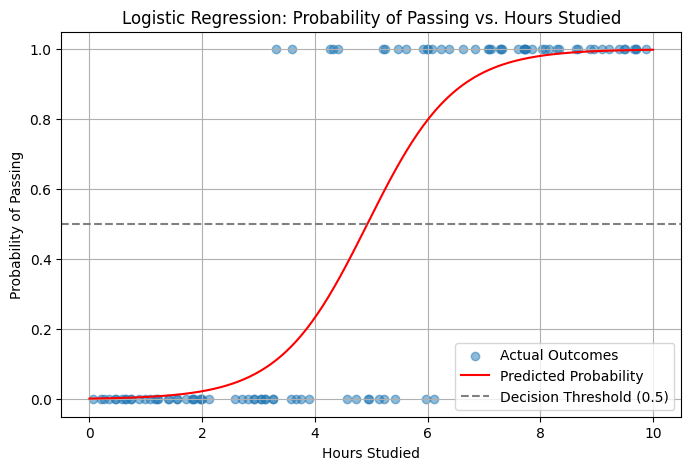

In [5]:
# Generate a range of study hours
x_range = np.linspace(0, 10, 300).reshape(-1, 1)
predicted_probs = model.predict_proba(x_range)[:, 1]

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(data['Hours_Studied'], data['Passed'], alpha=0.5, label='Actual Outcomes')
plt.plot(x_range, predicted_probs, color='red', label='Predicted Probability')
plt.axhline(0.5, color='gray', linestyle='--', label='Decision Threshold (0.5)')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression: Probability of Passing vs. Hours Studied')
plt.legend()
plt.grid(True)
plt.show()


## 🧠 Interpretation

- The red curve shows the model's predicted probability of passing.
- The dashed line at 0.5 represents the decision threshold.
- The point where the curve crosses 0.5 indicates the number of hours needed to have a 50% chance of passing.
